In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("placement.csv")


In [3]:
df.sample(4)

,cgpa,placement_exam_marks,placed
570,7.04,18.0,0
461,7.39,12.0,0
348,6.13,17.0,1
993,6.73,21.0,1


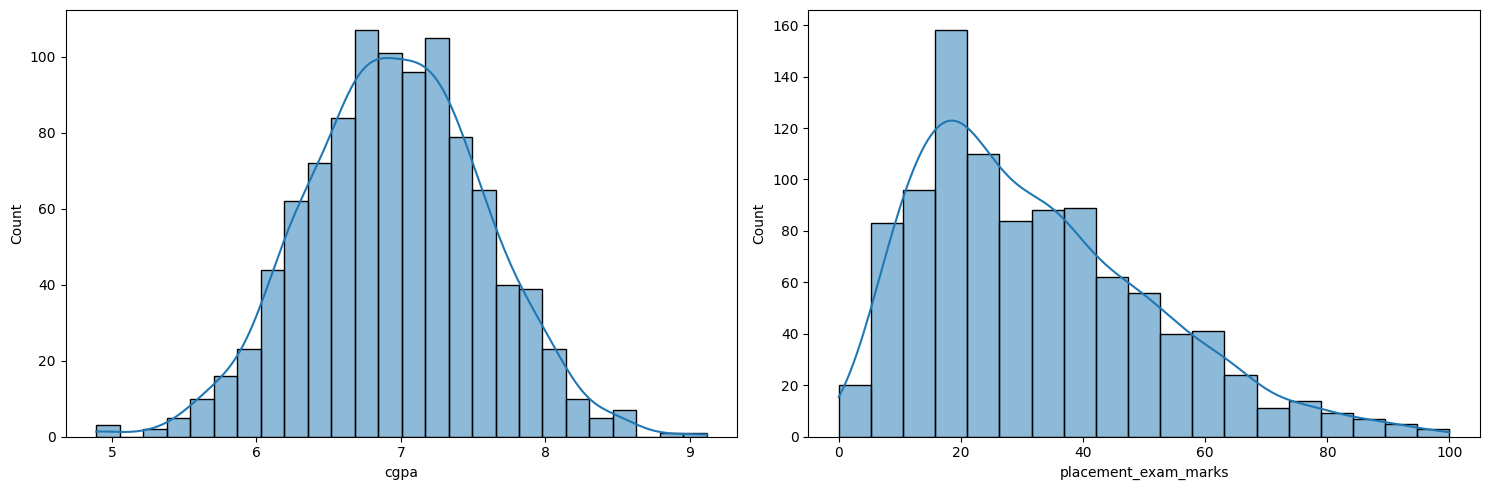

In [4]:


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["cgpa"], kde=True)

plt.subplot(1, 2, 2)
sns.histplot(df["placement_exam_marks"], kde=True)  # Corrected here

plt.tight_layout()  # Optional: Adjusts layout so plots fit well
plt.show()


In [5]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

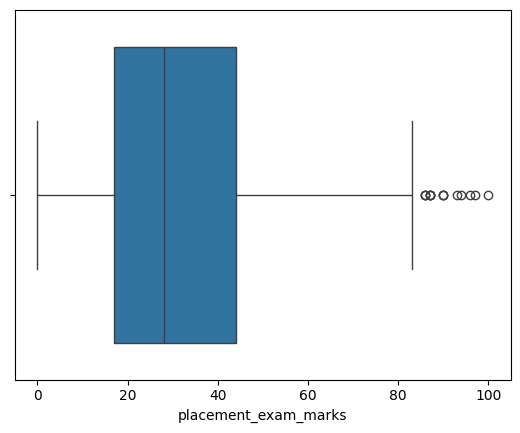

In [9]:
sns.boxplot(data=df["placement_exam_marks"], orient='h')

In [10]:
#finding the IQR
percentitle25 = df["placement_exam_marks"].quantile(0.25)
percentitle75 = df["placement_exam_marks"].quantile(0.75)

In [11]:
print(percentitle75)

44.0


In [12]:
iqr = percentitle75 - percentitle25

In [13]:
iqr

27.0

In [14]:
upper_limit = percentitle75 + 1.5 * iqr
lower_limit = percentitle25 - 1.5 * iqr

In [16]:
print("upper_limit: ",upper_limit)
print("lower_limit: ",lower_limit)

upper_limit:  84.5
lower_limit:  -23.5


Finding outliers

In [19]:
#finding outliers
df[df["placement_exam_marks"] > upper_limit]

cgpa                    15
placement_exam_marks    15
placed                  15
dtype: int64

In [20]:
#finding outliers
df[df["placement_exam_marks"] < lower_limit]

,cgpa,placement_exam_marks,placed


Trimming

In [27]:
new_df = df[df["placement_exam_marks"] < upper_limit]

In [28]:
new_df.shape

(985, 3)

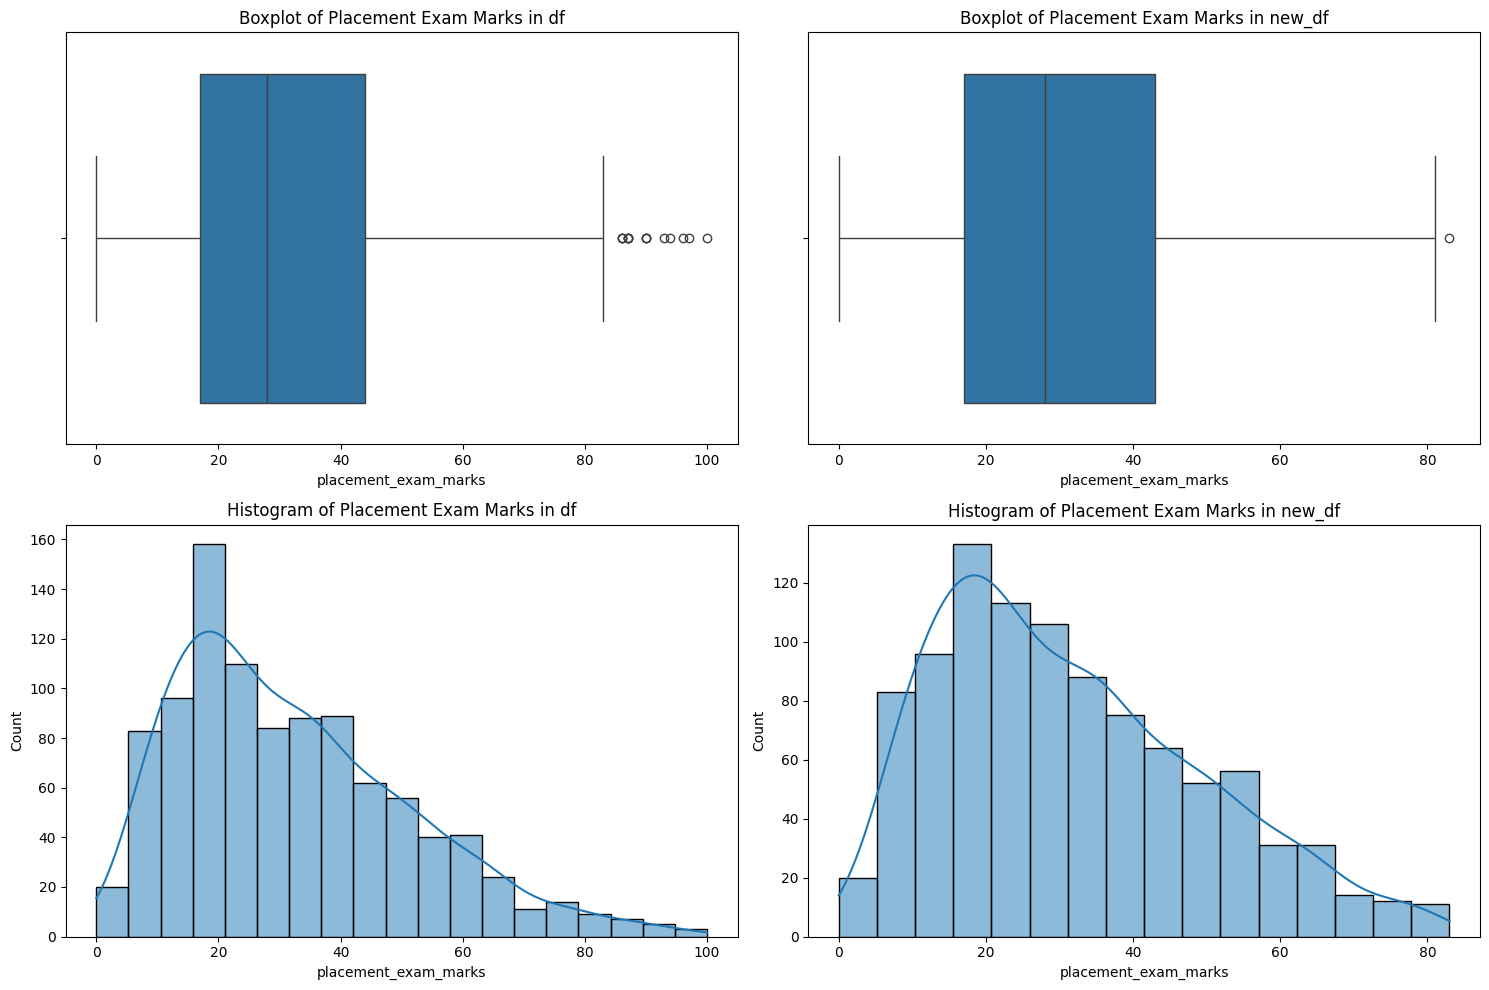

In [31]:


plt.figure(figsize=(15, 10))

# Boxplot for df
plt.subplot(2, 2, 1)
sns.boxplot(df["placement_exam_marks"], orient='h')
plt.title("Boxplot of Placement Exam Marks in df")

# Boxplot for new_df
plt.subplot(2, 2, 2)
sns.boxplot(new_df["placement_exam_marks"], orient='h')
plt.title("Boxplot of Placement Exam Marks in new_df")

# Histogram for df
plt.subplot(2, 2, 3)
sns.histplot(df["placement_exam_marks"], kde=True)
plt.title("Histogram of Placement Exam Marks in df")

# Histogram for new_df
plt.subplot(2, 2, 4)
sns.histplot(new_df["placement_exam_marks"], kde=True)
plt.title("Histogram of Placement Exam Marks in new_df")

plt.tight_layout()  # Adjusts layout so plots fit well
plt.show()


capping

In [34]:
new_df_cap = df.copy()

new_df_cap["placement_exam_marks"] = np.where(
    new_df_cap["placement_exam_marks"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["placement_exam_marks"] < lower_limit,
        lower_limit,
        new_df_cap["placement_exam_marks"]
   
    )
)

In [35]:
new_df_cap.shape

(1000, 3)

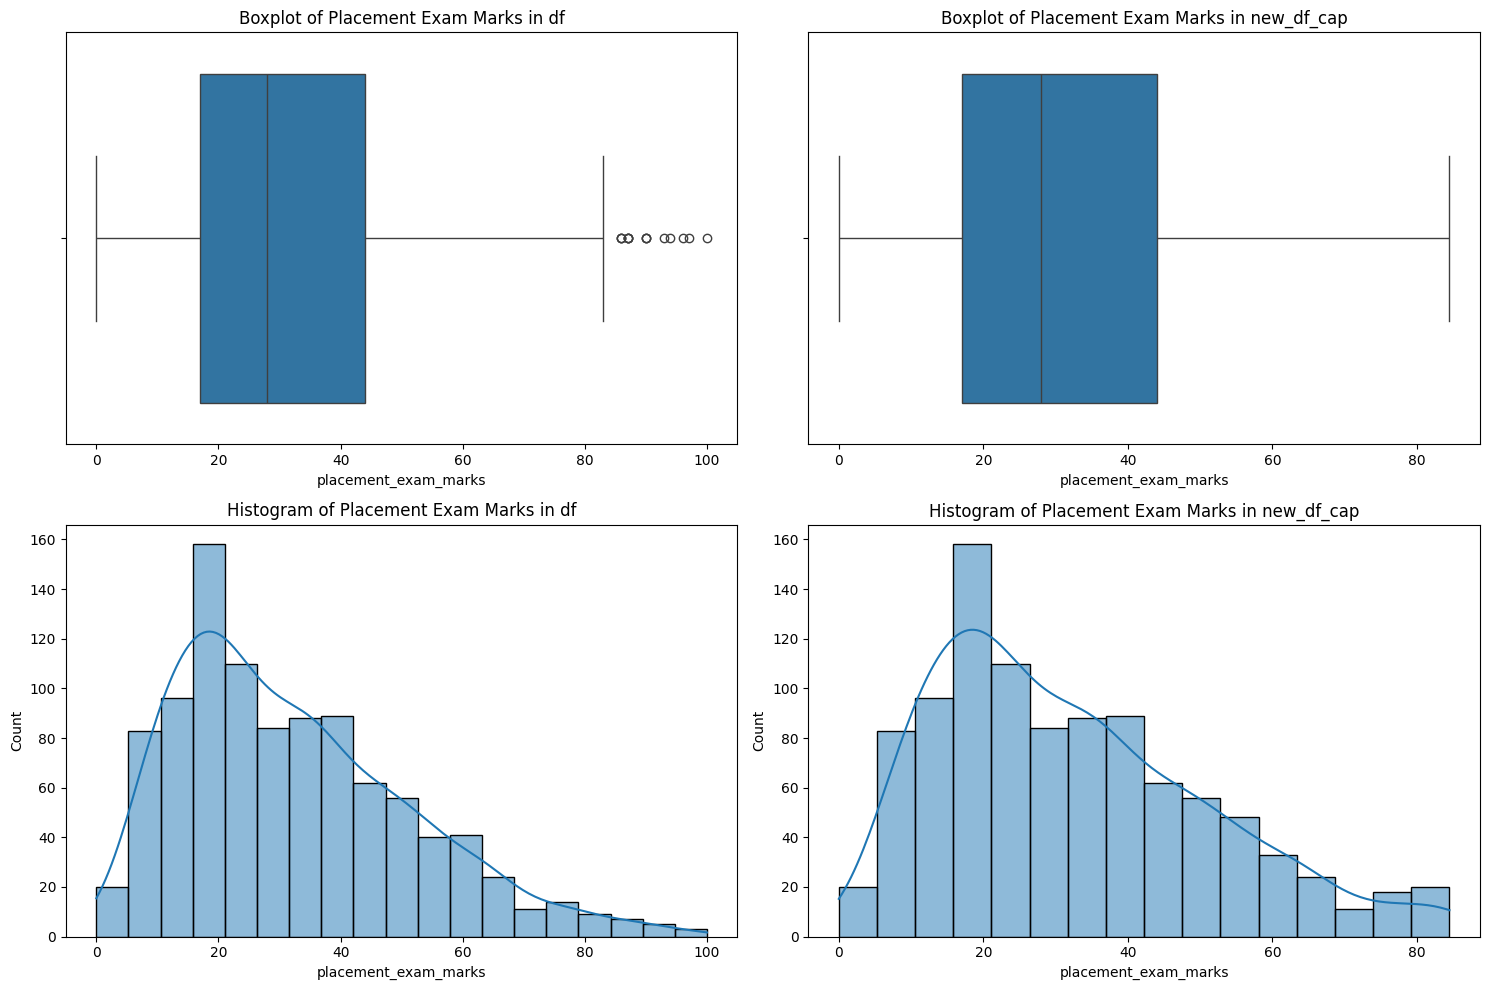

In [37]:
#compairing

plt.figure(figsize=(15, 10))

# Boxplot for df
plt.subplot(2, 2, 1)
sns.boxplot(df["placement_exam_marks"], orient='h')
plt.title("Boxplot of Placement Exam Marks in df")

# Boxplot for new_df
plt.subplot(2, 2, 2)
sns.boxplot(new_df_cap["placement_exam_marks"], orient='h')
plt.title("Boxplot of Placement Exam Marks in new_df_cap")

# Histogram for df
plt.subplot(2, 2, 3)
sns.histplot(df["placement_exam_marks"], kde=True)
plt.title("Histogram of Placement Exam Marks in df")

# Histogram for new_df
plt.subplot(2, 2, 4)
sns.histplot(new_df_cap["placement_exam_marks"], kde=True)
plt.title("Histogram of Placement Exam Marks in new_df_cap")

plt.tight_layout()  # Adjusts layout so plots fit well
plt.show()
